In [ ]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Some hidden code... to show/hide this cell's raw code input, click (or double click if stubborn!) <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################
from IPython.core.display import HTML
def css_styling():
    styles = open("./STUFF/colors.css", "r").read()
    return HTML(styles)
css_styling()

<div class=warn>
These blue boxes contain instructions for you to follow, or stuff for you to do
<h2>How to access this Jupyter notebook</h2>

* <b>Step 1</b>: Open a web browser, go to [this page](https://warwick.ac.uk/fac/sci/chemistry/research/maurer/maurergroup/software/iatl_strategic_project/), scroll down, download the Login App (the Windows exacutable if using ITS machines) and double click on the executable (usually ended up into the Download folder) <br>
* <b>Step 2</b>: The Notebook Launcher pops up: select the CH274 module and fill in the boxes using your SCRTP username and password <br>
* <b>Step 3</b>: Open the Jupyter notebook you are interested in, e.g. KS_3_Class.ipynb <br>
* <b>Step 4</b>: Make a copy of the orginal notebook (which is read only). In the toolbar on top of the notebook: File - Make a Copy <br>
* <b>Step 5</b>: You're all set! <br><br>
<b> Remember: </b> You can access this notebook at home at any time by going through the same steps on e.g. your laptop - all the changes you have made will be saved and synced! At the moment, though, you'll have to tunnel through the campus network via VPN (see [here](https://warwick.ac.uk/services/its/servicessupport/networkservices/vpn/))<br>
<div/>

# CH274: Computational Workshop 3
## Using a Hückel MO code to study Polyaromatic Hydrocarbons (PAHs)

In this workshop, we are going to
* see how a Huckel/tight-binding Python code works
* apply this code to study the stability and reactivity of three different polyaromatic hydrocarbons, namely:
<img src="STUFF/3mols.png">

These three molecules are PAH molecules, which are created from incomplete combustion in cars, industrial exhaust, and soot. They are known potent carcinogens. All three have the same number of sp2 hybridised carbon atoms (22) and we can compare them directly with Hückel theory.





Based on the contents of this workshop, you will be given a homework assignment.


## Part 1: Setting up the input data

We will first set up our input data for the three molecules. The code will require the respective Hückel matrices as input. We can use the connectivity matrix that defines the molecule, which is almost the same as the Hückel matrix. The connectivity matrix tells us which carbon atoms are connected to each other. If atoms are bonded, the matrix element is -1, if they are non-bonded, the matrix element has a 0.

The following cell reads the required information for the three molecules from a database of more than 500 PAHs and then prints the connectivity matrices and the Lewis formulas.

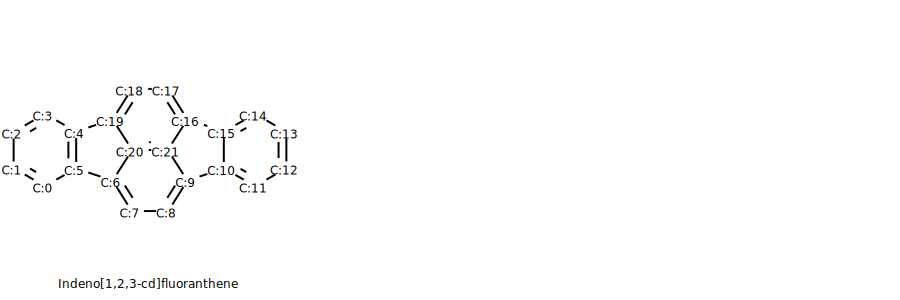

 0  -1   0   0   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
-1   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0  -1   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0   0  -1   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0   0   0  -1   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0  -1   0   0  
-1   0   0   0  -1   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0   0   0   0   0  -1   0  -1   0   0   0   0   0   0   0   0   0   0   0   0  -1   0  
 0   0   0   0   0   0  -1   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0   0   0   0   0   0   0  -1   0  -1   0   0   0   0   0   0   0   0   0   0   0   0  
 0   0   0   0   0   0   0   0  -1   0  -1   0   0   0   0   0   0   0   0   0   0  -1  
 0   0   0   0   0   0   0   0   0  -1   0  -1   0   0   0  -1   0   0   0   0   0   0  
 0   0   0   0   0   

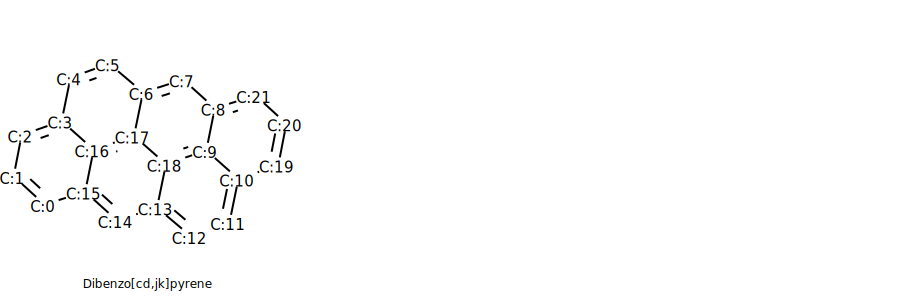

 0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0  -1   0   0   0   0   0   0  
-1   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0  -1   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0   0  -1   0  -1   0   0   0   0   0   0   0   0   0   0   0  -1   0   0   0   0   0  
 0   0   0  -1   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0   0   0   0  -1   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0   0   0   0   0  -1   0  -1   0   0   0   0   0   0   0   0   0  -1   0   0   0   0  
 0   0   0   0   0   0  -1   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0   0   0   0   0   0   0  -1   0  -1   0   0   0   0   0   0   0   0   0   0   0  -1  
 0   0   0   0   0   0   0   0  -1   0  -1   0   0   0   0   0   0   0  -1   0   0   0  
 0   0   0   0   0   0   0   0   0  -1   0  -1   0   0   0   0   0   0   0  -1   0   0  
 0   0   0   0   0   

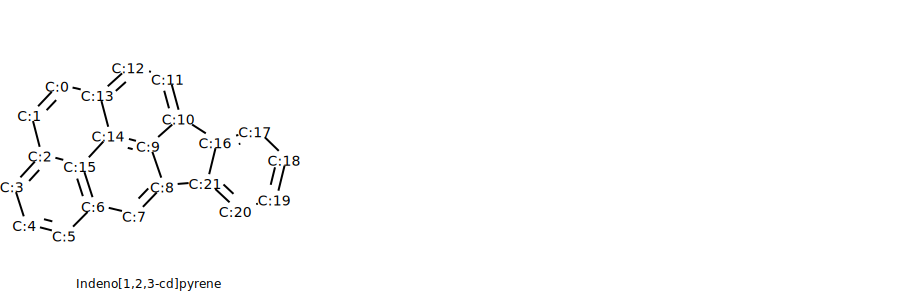

 0  -1   0   0   0   0   0   0   0   0   0   0   0  -1   0   0   0   0   0   0   0   0  
-1   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0  -1   0  -1   0   0   0   0   0   0   0   0   0   0   0  -1   0   0   0   0   0   0  
 0   0  -1   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0   0   0  -1   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0   0   0   0  -1   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0   0   0   0   0  -1   0  -1   0   0   0   0   0   0   0  -1   0   0   0   0   0   0  
 0   0   0   0   0   0  -1   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0   0   0   0   0   0   0  -1   0  -1   0   0   0   0   0   0   0   0   0   0   0  -1  
 0   0   0   0   0   0   0   0  -1   0  -1   0   0   0  -1   0   0   0   0   0   0   0  
 0   0   0   0   0   0   0   0   0  -1   0  -1   0   0   0   0  -1   0   0   0   0   0  
 0   0   0   0   0   

In [1]:
from rdkit import Chem
import rdkit.Chem.Draw
from rdkit.Chem import AllChem
from IPython.display import SVG, display
from PAH_data import select_molecule, matprint, mol_with_atom_index
import matplotlib.pyplot as plt

#from rdkit.Chem.Draw import IPythonConsole
#IPythonConsole.ipython_useSVG = True
#TODO Pillow verison issue at the moment

#######################

#This function generates a set of 43 PAH molecules with 22 carbon atoms each
#dataset, mols, legend = generate_dataset(myid=1673606, n_molecules=43, n_carbon_atoms=22)
names = [
    'Indeno[1,2,3-cd]fluoranthene',
    'Dibenzo[cd,jk]pyrene',
    'Indeno[1,2,3-cd]pyrene',
]
molecules = []
rdkit_objects = []
for i in range(3):
    mol, mol_object = select_molecule(names[i])
    molecules.append(mol)
    rdkit_objects.append(mol_object)

#########DATA
#list of three connnectivity matrices
conmats = [(molecules[0])['conmat'], molecules[1]['conmat'], molecules[2]['conmat']]
#list of three molecule names
names = names
#list of three RDKIT molecuel objects
molecules = rdkit_objects
        
#display(SVG(Chem.Draw.MolsToGridImage([molecules[0]], useSVG=True, legends=[leg[0]], subImgSize=(300,300))))
display(SVG(Chem.Draw.MolsToGridImage([mol_with_atom_index(molecules[0])], useSVG=True, legends=[names[0]], subImgSize=(300,300))))
matprint(conmats[0])

display(SVG(Chem.Draw.MolsToGridImage([mol_with_atom_index(molecules[1])], useSVG=True, legends=[names[1]], subImgSize=(300,300))))
matprint(conmats[1])

display(SVG(Chem.Draw.MolsToGridImage([mol_with_atom_index(molecules[2])], useSVG=True, legends=[names[2]], subImgSize=(300,300))))
matprint(conmats[2])
#This line generates the picture of the three molecules



<div class=warn>

<b> Task 1: Use the following text cell to make notes and answer following questions:</b><br>

<ul>
<li> Verify that the connectivity matrices are correct and that they are consistent with the provided atom numbering.</li>
<li> Are the three molecules alternant or non-alternant? </li>

</ul>

</div>

#### Answers to Task 1:



We can consider the connectivity matrices to be Hückel matrices, where we have set
$$\alpha=\langle \phi_i|H|\phi_i\rangle = 0 $$
and 
$$\beta=\langle \phi_i|H|\phi_j\rangle = -1 $$

**NOTE**: Because we have set $\beta=-1$, our energies will be numbers that already reflect the correct energy ordering. Therefore, we do not have to consider the implicit fact that $\beta<0$ in $2\beta$ ie. the lower the number, the more stable the energy level. We have to use actual numbers, as we cannot use variables $\alpha,\beta$ in a numerical code.

## Part 2: How to use the Hückel code


The code we will use is called ```shmo``` and is documented here:
https://github.com/randlet/SHMO

Let's learn how to use the code with the example of benzene.
We first pull the Hückel matrix of benzene from the database and then initialise the HuckelSolver with it.

<div class=warn>

<b> Task 2:</b> Explore the Hückel SHMO module<br>

</div>

In [2]:
import numpy as np
import shmo

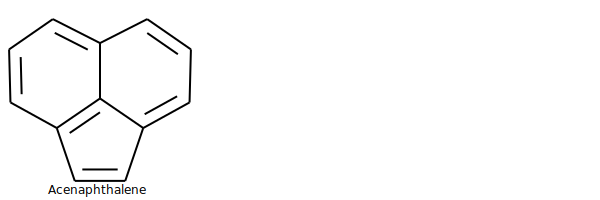

 0   0   0   0  -1   0  -1   0   0   0   0   0  
 0   0   0   0   0  -1   0  -1   0   0   0   0  
 0   0   0   0  -1   0   0   0   0   0  -1   0  
 0   0   0   0   0  -1   0   0   0   0  -1   0  
-1   0  -1   0   0   0   0   0   0   0   0   0  
 0  -1   0  -1   0   0   0   0   0   0   0   0  
-1   0   0   0   0   0   0   0  -1   0   0  -1  
 0  -1   0   0   0   0   0   0   0  -1   0  -1  
 0   0   0   0   0   0  -1   0   0  -1   0   0  
 0   0   0   0   0   0   0  -1  -1   0   0   0  
 0   0  -1  -1   0   0   0   0   0   0   0  -1  
 0   0   0   0   0   0  -1  -1   0   0  -1   0  


In [3]:
#select benzene
mol, rdkit_mol = select_molecule('Acenaphthalene')

#get huckel matrix
huckel_matrix = mol['conmat']

#draw molecule from rdkit mol object
display(SVG(Chem.Draw.MolsToGridImage([rdkit_mol], useSVG=True, legends=['Acenaphthalene'], subImgSize=(200,200))))

#print huckel matrix
matprint(huckel_matrix)

In [4]:
#initialise huckel solver
solver = shmo.HuckelSolver(data=huckel_matrix)

Now that the Huckel solver is initialised, we can calculate a lot of different properties.
If you want to find out about all the different properties you can calculate, try the following:

Use the next code cell to type:
```
solver.
```


and then press the tab key. This will give you a drop-down list of all possible functions you can access with

```
solver.<functionname>
```

As usual, placing a question mark behind the function, will tell you what it does.

In [5]:
solver.energies?

[-2.47083742 -1.68776669 -1.68250707 -1.         -0.83083003 -0.63751679
  0.28462968  1.          1.30972147  1.43184618  1.91898595  2.36427472]


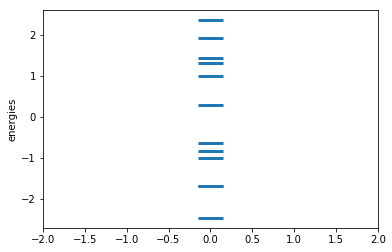

In [6]:
#eigenenergies
print(solver.energies)

#energy level diagram for benzene
plt.plot(np.zeros(len(solver.energies)), solver.energies,lw=0.0,marker='_',ms=25,mew=3)
plt.xlim(-2,2)
plt.ylabel('energies')
plt.show()

In [7]:
#eigenvectors
eigenvecs = solver.eigen_vectors
matprint(np.array(eigenvecs))

 0.224325   0.224325      0.216736      0.216736    0.178507    0.178507      0.375764     0.375764      0.255476      0.255476      0.357014       0.44865  
0.0197581  0.0197581     -0.391395     -0.391395   -0.220194   -0.220194      0.253541     0.253541      0.368645      0.368645     -0.440389     0.0395162  
-0.422061   0.422061      -0.23053       0.23053   -0.387868    0.387868     -0.322253     0.322253     -0.120131      0.120131   -9.4473e-15   1.11716e-15  
 0.408248   0.408248  -3.88578e-16  -8.32667e-16    0.408248    0.408248  -1.11022e-16  7.77156e-16  -1.41553e-15  -9.02056e-16     -0.408248     -0.408248  
-0.120131   0.120131      0.387868     -0.387868    0.322253   -0.322253     -0.422061     0.422061      -0.23053       0.23053   4.44089e-16   4.30211e-16  
 0.210933   0.210933     -0.243987     -0.243987  -0.0518486  -0.0518486      0.186322     0.186322     -0.514015     -0.514015     -0.103697      0.421866  
-0.387868   0.387868      0.422061     -0.422061   -

For molecules fo this size, there is no way we can visually inspect the coefficients and understand the molecular orbitals. Below, you will find a function that allows you to visualise the orbitals.

In [8]:
%matplotlib inline 
from ipywidgets import interact, interactive, fixed, interact_manual
from PAH_data import draw_MO

interactive(draw_MO, mol=fixed(rdkit_mol), eigenvecs=fixed(eigenvecs), n=range(len(eigenvecs)))


A Jupyter Widget

[-0.9088772  -0.9088772  -0.92656079 -0.92656079 -1.00798783 -1.00798783
 -1.04435983 -1.04435983 -1.06590794 -1.06590794 -0.99764181 -1.09497102]
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0


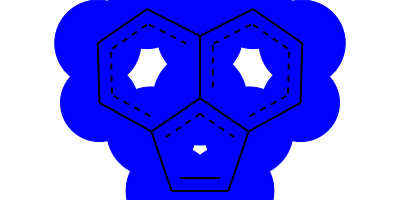

In [9]:
#charge populations
print(solver.charge_densities)
draw_MO(rdkit_mol, solver.charge_densities)

[ 0.0911228   0.0911228   0.07343921  0.07343921 -0.00798783 -0.00798783
 -0.04435983 -0.04435983 -0.06590794 -0.06590794  0.00235819 -0.09497102]
1.0
1.0
1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0


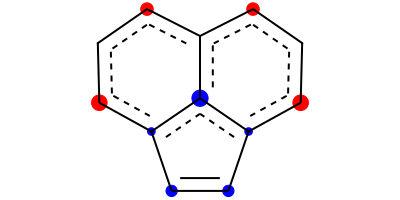

In [10]:
#net charges (charge populations - atomic charge)
print(solver.net_charges)
draw_MO(rdkit_mol, solver.net_charges*2.)

[-0.44724084 -0.44724084 -0.46617458 -0.46617458 -0.39737396 -0.39737396
 -0.34777783 -0.34777783 -0.47263324 -0.47263324 -0.32797971 -0.3544591 ]
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0


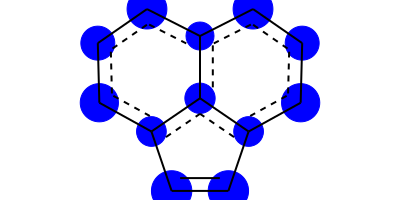

In [11]:
#atomic self-polarisabilities
self_polarisabilities = np.diag(solver.aa_polar)
print(self_polarisabilities)
draw_MO(rdkit_mol, self_polarisabilities)

We can also calculate the **total energy** and the **bond order**:

In [12]:
#total energy
def calculate_total_energy(solver):
    """
    This function calculates the total energy
    """
    total_energy = 0.0
    for state in solver.populated_levels:
        total_energy += state[0]*state[2]
    return total_energy

#neutral molecule energy
print('neutral molecule')
solver.set_num_electrons(12)
print(calculate_total_energy(solver))

#make cation
print('cation')
solver.set_num_electrons(solver.num_electrons-1)
print(calculate_total_energy(solver))

#make anion
print('anion')
solver.set_num_electrons(solver.num_electrons+2)
print(calculate_total_energy(solver))

solver.set_num_electrons(12)

neutral molecule
-16.6189159718
cation
-15.9813991821
anion
-16.3342862953


In [13]:
def print_bond_orders(solver):
    """
    print bond orders to screen
    """

    bond_orders=np.multiply(-huckel_matrix,solver.bond_orders)

    print('atom i    atom j    bond order')
    atom_pairs = []
    borders = []
    for pair in solver.bond_pairs():
        i, j = pair
        print("  {0:3d}      {1:3d}      {2:8.3f}".format(i+1, j+1, bond_orders[i,j]))
        atom_pairs.append([i+1,j+1])
        borders.append(bond_orders[i,j])

    return atom_pairs, borders
        
atom_pairs, bond_orders = print_bond_orders(solver)

atom i    atom j    bond order
    1        5         0.633
    1        7         0.631
    2        6         0.633
    2        8         0.631
    3        5         0.704
    3       11         0.550
    4        6         0.704
    4       11         0.550
    7        9         0.459
    7       12         0.514
    8       10         0.459
    8       12         0.514
    9       10         0.796
   11       12         0.531


<div class=warn>

<b> Task 3</b><br>

<ul>
<li> Write a function that calculates the bond number based on the bond orders</li>

</ul>

</div>



In [14]:
def calculate_bond_number(atom_pairs, bond_orders):
    """
    ...
    """
    
    #<insert code to calculate bond_number for each atom
    
    #return bond_number
    
    
#plot bond number 
#draw_MO(rdkit_mol, bond_number)

## Part 3: Hückel calculation and analysis of the three molecules

<div class=warn>

<b> Task 4</b><br>

<ol>
<li> Calculate the total energies of Indeno[1,2,3-cd]fluoranthene, Dibenzo[cd,jk]pyrene, Indeno[1,2,3-cd]pyrene. Which molecule is more stable? </li>
<li> Calculate the cations and anions of the three molecules. Which cation and which anion is more stable? Use the energy levels and wave functions to explain the stability trend.</li>
<li> For the three molecules, find out which carbon atom is most easily attacked by (A) a nucleophililic reaction agent and (B) an electrophilic reaction agent.</li>

</ol>

</div>